<a href="https://colab.research.google.com/github/maipatana/AR788/blob/master/AR788_Week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
_URL = 'https://ar788.s3-ap-southeast-1.amazonaws.com/Dataset100.zip'

path_to_zip = tf.keras.utils.get_file('Dataset100.zip',
                                      origin=_URL,
                                      extract=True,
                                      archive_format='zip')

data_dir = os.path.join(os.path.dirname(path_to_zip), 'Dataset100/')

In [ ]:
print(data_dir)
print([i for i in os.listdir(data_dir)])

/root/.keras/datasets/Dataset100/
['rat', 'mue7', 'niwet', '.DS_Store', 'siri']


In [ ]:
batch_size = 32
img_height = 100
img_width = 100

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 430 files belonging to 4 classes.
Using 344 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 430 files belonging to 4 classes.
Using 86 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['mue7', 'niwet', 'rat', 'siri']


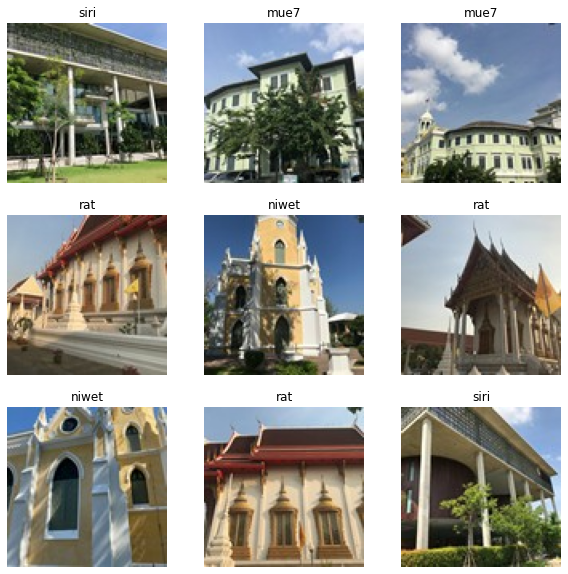

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 100, 100, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [37]:
num_classes = 4

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               10240128  
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 516       
Total params: 10,241,540
Trainable params: 10,241,540
Non-trainable params: 0
__________________________________________

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
11/11 [==============================] - 3s 292ms/step - loss: 1.4236 - accuracy: 0.3401 - val_loss: 1.2684 - val_accuracy: 0.4651
Epoch 2/10
11/11 [==============================] - 3s 277ms/step - loss: 1.2055 - accuracy: 0.4884 - val_loss: 0.9519 - val_accuracy: 0.7093
Epoch 3/10
11/11 [==============================] - 3s 278ms/step - loss: 0.8128 - accuracy: 0.7558 - val_loss: 0.6121 - val_accuracy: 0.7674
Epoch 4/10
11/11 [==============================] - 3s 277ms/step - loss: 0.5516 - accuracy: 0.7878 - val_loss: 0.6632 - val_accuracy: 0.7209
Epoch 5/10
11/11 [==============================] - 3s 287ms/step - loss: 0.4316 - accuracy: 0.8576 - val_loss: 0.3767 - val_accuracy: 0.8721
Epoch 6/10
11/11 [==============================] - 3s 280ms/step - loss: 0.2348 - accuracy: 0.9419 - val_loss: 0.2973 - val_accuracy: 0.8837
Epoch 7/10
11/11 [==============================] - 3s 279ms/step - loss: 0.2295 - accuracy: 0.9128 - val_loss: 0.3209 - val_accuracy: 0.8953
Epoch 

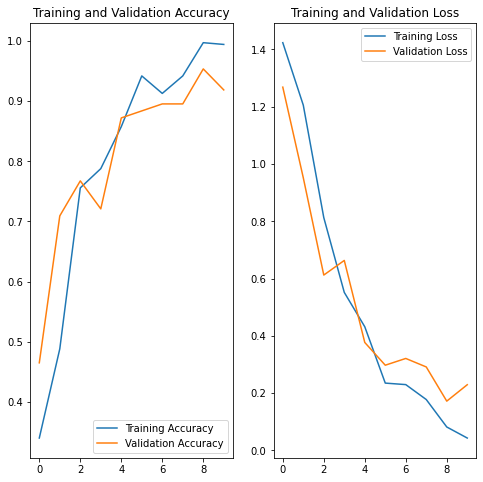

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()